In [ ]:
# Climate Change Modeling - Machine Learning Project
# Domain: Data Science | Technology: Machine Learning & NLP

In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import LatentDirichletAllocation

nltk.download("stopwords")
nltk.download("vader_lexicon")


In [ ]:
import pandas as pd


In [17]:
# 2. Load the Dataset
climate_change = pd.read_csv(r"C:\Users\rohit\OneDrive\Documents\climate_nasa.csv")


In [9]:
climate_change.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [18]:
# 3. Dataset Overview
climate_change.info()
climate_change.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [19]:
import pandas as pd

# Read the dataset first
climate_change = pd.read_csv(r"C:\Users\rohit\OneDrive\Documents\climate_nasa.csv")

# Convert date column into datetime format
climate_change['date'] = pd.to_datetime(
    climate_change['date'],
    errors='coerce'
)

# Extract year for trend analysis
climate_change['Year'] = climate_change['date'].dt.year


In [10]:
import matplotlib.pyplot as plt

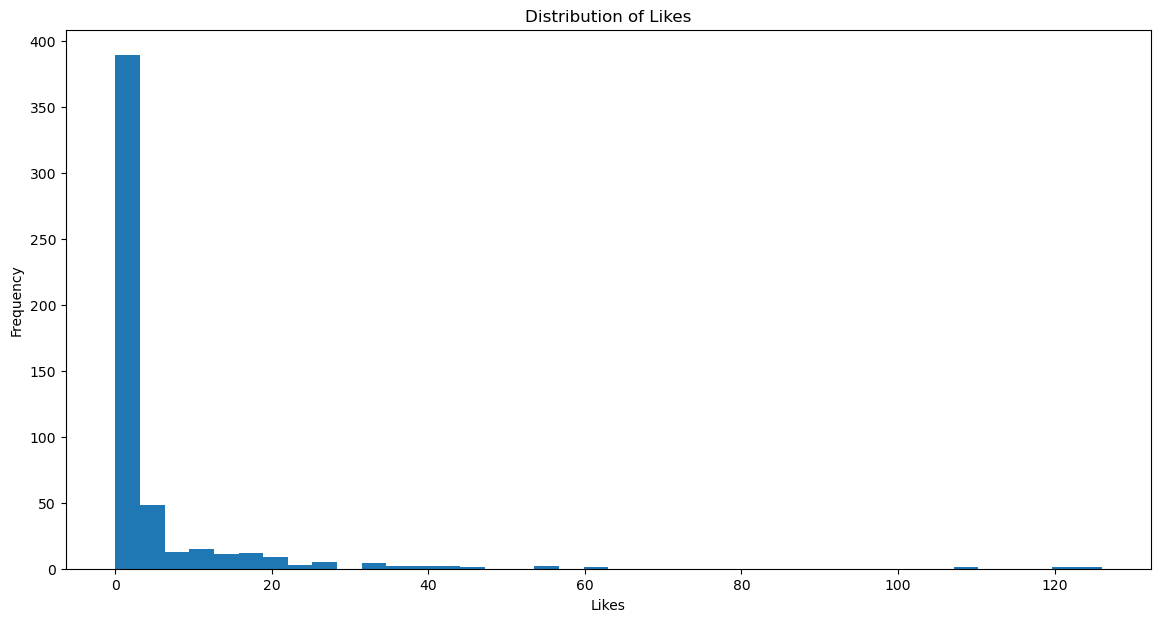

In [89]:
plt.figure(figsize=(14, 7))
plt.hist(climate_change['likesCount'], bins=40)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()



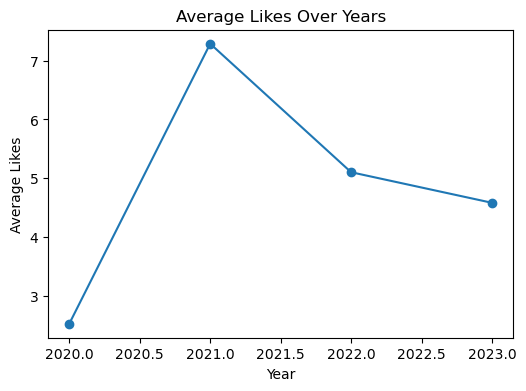

In [42]:
plt.figure(figsize=(6, 4))
climate_change.groupby('Year')['likesCount'].mean().plot(marker='o')
plt.title("Average Likes Over Years")
plt.ylabel("Average Likes")
plt.show()



In [57]:
# 6. Text Cleaning & Preprocessing
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

climate_change['CleanText'] = climate_change['CleanText'].apply(clean_text)


In [66]:
# 7. Feature Engineering (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(climate_change['CleanText'])

y = climate_change['likesCount']



In [86]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [68]:
# 9. Model Selection & Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
# 10. Model Evaluation
models = {
    "Linear Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n{name}")
    print("MAE :", mean_absolute_error(y_test, preds))
    print("MSE :", mean_squared_error(y_test, preds))
    print("R2  :", r2_score(y_test, preds))



Linear Regression
MAE : 6.086793293539628
MSE : 212.62090321516573
R2  : -0.1833918722314951

Decision Tree
MAE : 6.1091575091575105
MSE : 337.97308161923553
R2  : -0.881069037772328

Random Forest
MAE : 5.073629752186103
MSE : 188.94883085183235
R2  : -0.05163936055442897


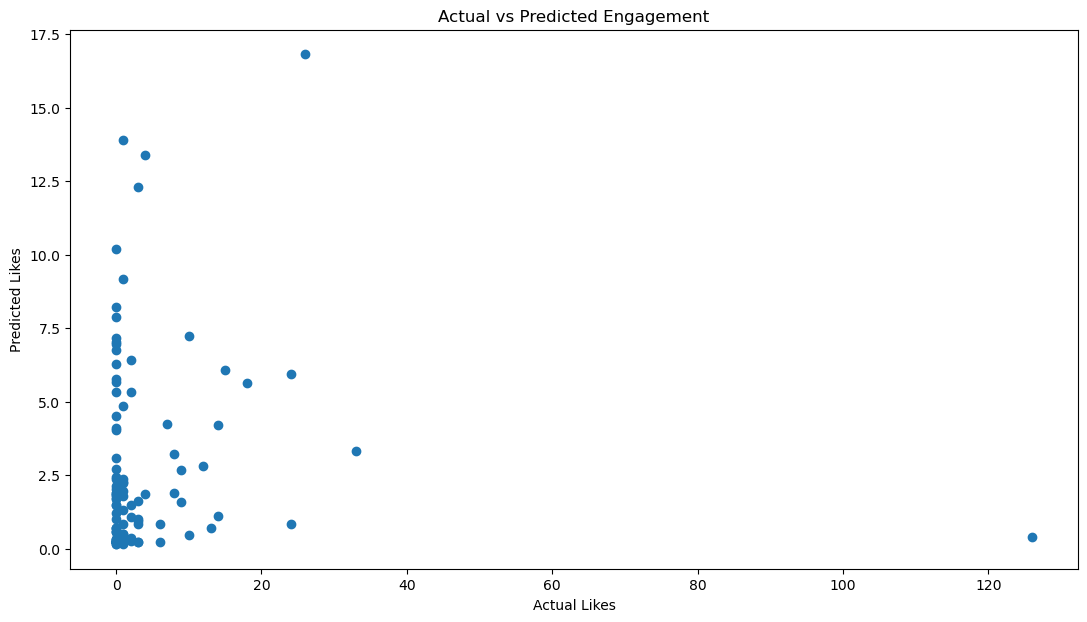

In [87]:
# 11. Actual vs Predicted Plot
rf_preds = rf_model.predict(X_test)
plt.figure(figsize=(13,7))
plt.scatter(y_test, rf_preds)
plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Actual vs Predicted Engagement")
plt.show()


In [79]:
# 12. Sentiment Analysis
sia = SentimentIntensityAnalyzer()

climate_change['SentimentScore'] = climate_change['CleanText'].apply(
    lambda x: sia.polarity_scores(str(x))['compound']
)

def label_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

climate_change['Sentiment'] = climate_change['SentimentScore'].apply(label_sentiment)


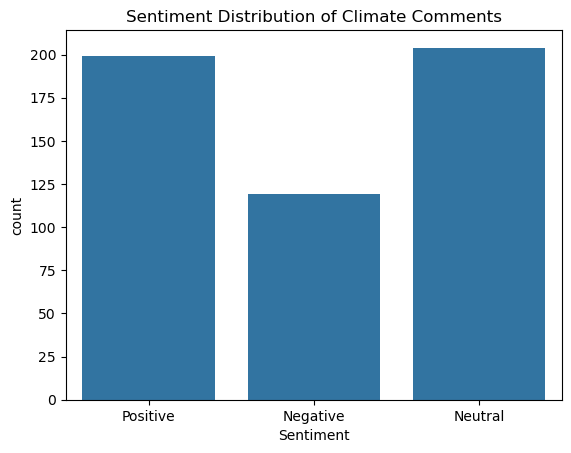

In [80]:
# 13. Sentiment Distribution
sns.countplot(x='Sentiment', data=climate_change)
plt.title("Sentiment Distribution of Climate Comments")
plt.show()


In [81]:
# 14. Topic Modeling (LDA)
lda = LatentDirichletAllocation(
    n_components=5,
    random_state=42
)

lda.fit(X)


,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [82]:
words = tfidf.get_feature_names_out()

for i, topic in enumerate(lda.components_):
    print(f"\nTopic {i+1}:")
    print([words[j] for j in topic.argsort()[-10:]])



Topic 1:
['years', 'understand', 'back', 'ice', 'co', 'people', 'climate', 'dont', 'global', 'warming']

Topic 2:
['global', 'ever', 'years', 'wow', 'hemisphere', 'bs', 'cooling', 'know', 'start', 'nan']

Topic 3:
['science', 'nasa', 'show', 'planet', 'earth', 'years', 'us', 'time', 'change', 'climate']

Topic 4:
['planet', 'thank', 'oh', 'thanks', 'nasa', 'people', 'data', 'earth', 'change', 'climate']

Topic 5:
['fake', 'carbon', 'need', 'deniers', 'going', 'move', 'climate', 'excellent', 'nasa', 'agree']


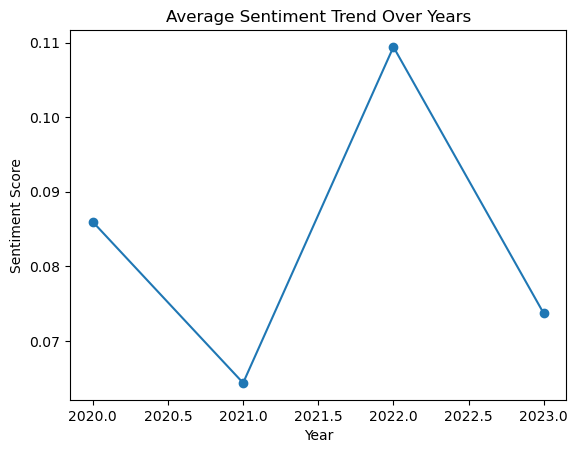

In [83]:
# 15. Trend Analysis (Sentiment Over Time)
climate_change.groupby('Year')['SentimentScore'].mean().plot(marker='o')
plt.title("Average Sentiment Trend Over Years")
plt.ylabel("Sentiment Score")
plt.show()


In [85]:
# ===============================
# 16. Future Engagement Prediction
# ===============================

new_comment = "Climate change is real and NASA is doing important research"

clean_comment = clean_text(new_comment)
comment_vector = tfidf.transform([clean_comment])

predicted_likes = rf_model.predict(comment_vector)
predicted_likes



array([6.81])